In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [11]:
# Importing dataset and examining it
dataset = pd.read_csv("/Users/chensiyu/Downloads/ChurnPrediction.csv")
pd.set_option('display.max_columns', None) # to make sure to see all the columns in output window
print(dataset.head())
print(dataset.shape)
print(dataset.info())
print(dataset.describe())

   Age PastEmployee BusinessTravel       Department  DistanceFromHome  \
0   46           No  Travel_Rarely  Human Resources                 5   
1   37          Yes  Travel_Rarely  Human Resources                 6   
2   59           No     Non-Travel  Human Resources                 2   
3   54           No     Non-Travel  Human Resources                26   
4   26           No  Travel_Rarely  Human Resources                25   

   Education   EducationField  EnvironmentSatisfaction  Gender  \
0          2          Medical                        2    Male   
1          4  Human Resources                        3    Male   
2          4  Human Resources                        3  Female   
3          3  Human Resources                        4  Female   
4          1    Life Sciences                        3  Female   

   JobInvolvement  JobLevel          JobRole  JobSatisfaction MaritalStatus  \
0               3         2  Human Resources                2      Divorced   
1     

In [12]:
# Converting Categorical features into Numerical features
def converter(column):
    if column == 'Yes':
        return 1
    else:
        return 0

dataset['PastEmployee'] = dataset['PastEmployee'].apply(converter)
dataset['OverTime'] = dataset['OverTime'].apply(converter)
# dataset['OverTime'] = dataset['OverTime'].map({'Yes':1, 'No':0})

dataset['Gender'] = dataset['Gender'].map({'Female':1, 'Male':0})
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   PastEmployee             1470 non-null   int64 
 2   BusinessTravel           1470 non-null   object
 3   Department               1470 non-null   object
 4   DistanceFromHome         1470 non-null   int64 
 5   Education                1470 non-null   int64 
 6   EducationField           1470 non-null   object
 7   EnvironmentSatisfaction  1470 non-null   int64 
 8   Gender                   1470 non-null   int64 
 9   JobInvolvement           1470 non-null   int64 
 10  JobLevel                 1470 non-null   int64 
 11  JobRole                  1470 non-null   object
 12  JobSatisfaction          1470 non-null   int64 
 13  MaritalStatus            1470 non-null   object
 14  MonthlyIncome            1470 non-null  

In [13]:
categorical_features = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
final_data = pd.get_dummies(dataset, columns = categorical_features)
print(final_data.info())
print(final_data.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   PastEmployee                       1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EnvironmentSatisfaction            1470 non-null   int64
 5   Gender                             1470 non-null   int64
 6   JobInvolvement                     1470 non-null   int64
 7   JobLevel                           1470 non-null   int64
 8   JobSatisfaction                    1470 non-null   int64
 9   MonthlyIncome                      1470 non-null   int64
 10  NumCompaniesWorked                 1470 non-null   int64
 11  OverTime                           1470 non-null   int64
 12  PercentSalaryHike   

In [14]:
# Dividing dataset into label and feature sets
X = final_data.drop('PastEmployee', axis = 1) # Features
Y = final_data['PastEmployee'] # Labels
print(type(X))
print(type(Y))
print(X.shape)
print(Y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(1470, 45)
(1470,)


In [15]:
# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)

In [16]:
# Dividing dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split( X_scaled, Y, test_size = 0.3, random_state = 100)

print(X_train.shape)
print(X_test.shape)

(1029, 45)
(441, 45)


In [17]:
# Implementing Oversampling to balance the dataset; SMOTE stands for Synthetic Minority Oversampling TEchnique
print("Number of observations in each class before oversampling (training data): \n", pd.Series(Y_train).value_counts())

smote = SMOTE(random_state = 101)
X_train,Y_train = smote.fit_resample(X_train,Y_train)
print("Number of observations in each class after oversampling (training data): \n", pd.Series(Y_train).value_counts())


Number of observations in each class before oversampling (training data): 
 0    859
1    170
Name: PastEmployee, dtype: int64
Number of observations in each class after oversampling (training data): 
 0    859
1    859
Name: PastEmployee, dtype: int64


In [19]:
# Building Classification Decision Tree Model
dtree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
dtree.fit(X_train, Y_train)
featimp = pd.Series(dtree.feature_importances_, index=list(X)).sort_values(ascending=False)
print(featimp)

OverTime                             0.397830
JobLevel                             0.089765
Age                                  0.086388
StockOptionLevel                     0.076930
YearsWithCurrManager                 0.066517
NumCompaniesWorked                   0.051707
JobRole_Sales Executive              0.045728
MonthlyIncome                        0.044257
EducationField_Technical Degree      0.032641
TrainingTimesLastYear                0.026588
MaritalStatus_Single                 0.022933
JobRole_Research Scientist           0.022118
JobSatisfaction                      0.016874
Education                            0.009926
EducationField_Other                 0.009796
PercentSalaryHike                    0.000000
JobRole_Manager                      0.000000
EnvironmentSatisfaction              0.000000
JobRole_Healthcare Representative    0.000000
JobRole_Human Resources              0.000000
JobRole_Laboratory Technician        0.000000
JobRole_Research Director         

Prediction Accuracy:  0.8072562358276644


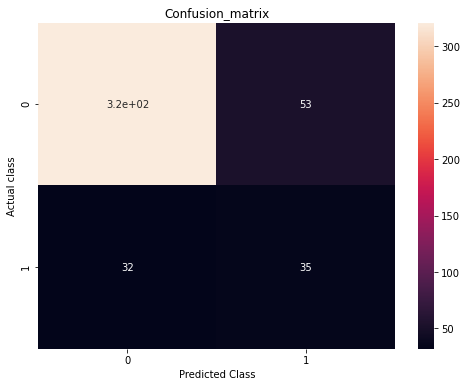

Confusion matrix: 
 [[321  53]
 [ 32  35]]
TP:  35
TN:  321
FP:  53
FN:  32


In [20]:
# Evaluating Decision Tree Model
Y_pred = dtree.predict(X_test)
print("Prediction Accuracy: ", metrics.accuracy_score(Y_test, Y_pred)) # Not a good idea coz imbalanced test set
conf_mat = metrics.confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat,annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.show()
print('Confusion matrix: \n', conf_mat)
print('TP: ', conf_mat[1,1])
print('TN: ', conf_mat[0,0])
print('FP: ', conf_mat[0,1])
print('FN: ', conf_mat[1,0])

In [21]:
# Tuning the tree size parameter 'max_depth' and implementing cross-validation using Grid Search
classifier = tree.DecisionTreeClassifier(criterion = 'entropy')
grid_param = {'max_depth': [2,3,4,5,10,15,20,25,30,35]}

gd_sr = GridSearchCV(estimator=classifier, param_grid=grid_param, scoring='recall', cv=5)

In [22]:
gd_sr.fit(X_train, Y_train)

best_parameters = gd_sr.best_params_
print(best_parameters)

best_result = gd_sr.best_score_ # Mean cross-validated score of the best_estimator
print(best_result)

{'max_depth': 20}
0.881361349109207


In [23]:
# Building random forest model
# Tuning the random forest parameter 'n_estimators' and implementing cross-validation using Grid Search
rfc = RandomForestClassifier(criterion='entropy', max_features='auto', random_state=1)
grid_param = {'n_estimators': [200, 250, 300, 350, 400, 450]}

gd_sr = GridSearchCV(estimator=rfc, param_grid=grid_param, scoring='recall', cv=5)

In [24]:
gd_sr.fit(X_train, Y_train)

best_parameters = gd_sr.best_params_
print(best_parameters)

best_result = gd_sr.best_score_ # Mean cross-validated score of the best_estimator
print(best_result)

# {'n_estimators': 400}
# 0.9034815721474228

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is 

{'n_estimators': 400}
0.9034815721474228


In [25]:
# Building random forest using the tuned parameter
rfc = RandomForestClassifier(n_estimators=400, criterion='entropy', max_features='auto', random_state=1)
rfc.fit(X_train,Y_train)
featimp = pd.Series(rfc.feature_importances_, index=list(X)).sort_values(ascending=False)
print(featimp)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


OverTime                             0.100510
Age                                  0.051994
TotalWorkingYears                    0.049009
MonthlyIncome                        0.047222
JobSatisfaction                      0.046536
StockOptionLevel                     0.043809
YearsWithCurrManager                 0.039752
EnvironmentSatisfaction              0.038533
MaritalStatus_Single                 0.037057
YearsAtCompany                       0.035712
JobLevel                             0.034170
DistanceFromHome                     0.033115
YearsInCurrentRole                   0.033110
NumCompaniesWorked                   0.032847
TrainingTimesLastYear                0.030930
JobInvolvement                       0.029861
YearsSinceLastPromotion              0.028294
Education                            0.027297
PercentSalaryHike                    0.027074
WorkLifeBalance                      0.024330
BusinessTravel_Travel_Frequently     0.019788
Gender                            

In [26]:
# Selecting features with higher sifnificance and redefining feature set
X = final_data[['OverTime', 'Age', 'TotalWorkingYears', 'MonthlyIncome', 'JobSatisfaction']]

feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)

In [27]:
# Dividing dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split( X_scaled, Y, test_size = 0.3, random_state = 100)

smote = SMOTE(random_state = 101)
X_train,Y_train = smote.fit_resample(X_train,Y_train)

In [28]:
# Tuning the random forest parameter 'n_estimators' and implementing cross-validation using Grid Search
rfc = RandomForestClassifier(criterion='entropy', max_features='auto', random_state=1)
grid_param = {'n_estimators': [200, 250, 300, 350, 400, 450]}

gd_sr = GridSearchCV(estimator=rfc, param_grid=grid_param, scoring='recall', cv=5)

In [29]:
gd_sr.fit(X_train, Y_train)

best_parameters = gd_sr.best_params_
print(best_parameters)

best_result = gd_sr.best_score_ # Mean cross-validated score of the best_estimator
print(best_result)

# {'n_estimators': 300}
# 0.8697062423500611

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is 

{'n_estimators': 300}
0.8697062423500611
